In [48]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos,sqrt,atan,sin,pi
# print(cos(90))

Swept volume by expansion piston: 0.025 m3
Work done: 556.319 J
Power output: 7417.588 Watts
pressure:  167146.73855114693
Max temperature:  502.6188876510086


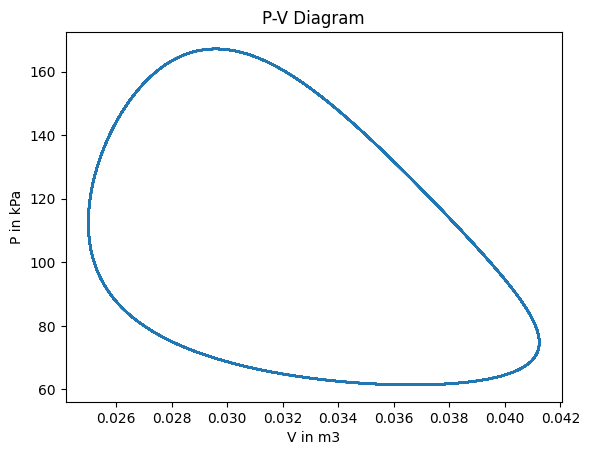

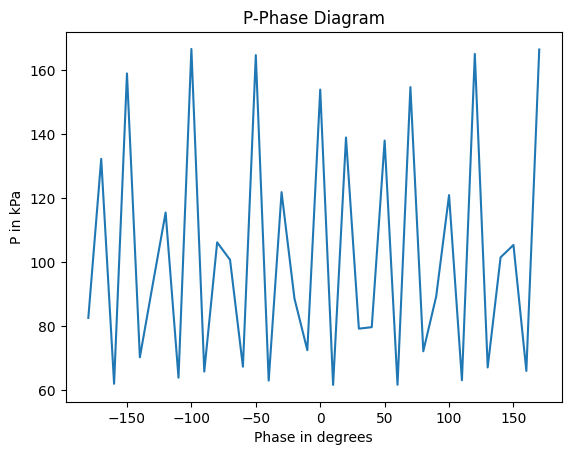

Text(0.5, 1.0, 'Vol-Phase Diagram')

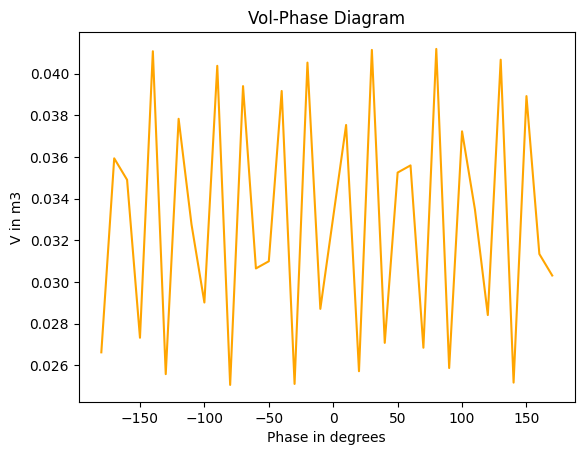

In [53]:
Vse  = 0.628 * 10**(-6)
Vde = 0.2*10**(-6)
# Vse = 0.00001
# Vde = 0.22*10**(-6)
Vdc = 0.2*2*10**(-6)
Vr = 0.2*10**(-6)
dx = np.pi/2
Pmean = 101.3*10**(3)
Te = 923
Tc = 318
n = 800/60

# for x in range(0,180,10):
#     x = x*pi/180
#     Ve = Vse*(1-np.cos(x))*0.5 + Vde
#     Vc = Vse*(1+np.cos(x))*0.5 + Vsc*(1-np.cos(x-dx))*0.5 + Vdc

#     P = Pmean*sqrt(1-c**2)/(1-c*np.cos(x-a))
#     V = Ve + Vr + Vc

#     plt.scatter(P,V)







We_for_plot = np.array([])
Wc_for_plot = np.array([])

for i in range(100000):
    Vsc = Vse/1.54
    t = Tc/Te
    v = Vsc/Vse
    Vb = (Vse + Vsc)/2
    Xde = Vde/Vse
    Xdc = Vdc/Vse
    Xr = Vr/Vse
    # Xb = Vb/Vse
    Xb = 0

    a = np.arctan(v*np.sin(dx)/(t + np.cos(dx)+1))
    S = t + 2*t*Xde + 4*t*Xr/(1+t) + v+2*Xdc + 1 - 2*Xb
    # print("S: ", S)
    
    B = np.sqrt(t**2 + 2*(t-1)*v*np.cos(dx) + v**2-2*t +1)
    # print("B: ",B)
    c = B/S
    # print("c: ",c)
    x = np.arange(-180,180,0.01)
    

    Ve = Vse*(1-np.cos(x))*0.5 + Vde
    
    Vc = Vse*(1+np.cos(x))*0.5 + Vsc*(1-np.cos(x-dx))*0.5 + Vdc
    
    P = Pmean*np.sqrt(1-c**2)/(1-c*np.cos(x-a))
    
    V = Ve + Vr + Vc

    We = Pmean*Vse*c*np.sin(a)*np.pi/(1+np.sqrt(1-c**2))
    Wc = -Pmean*Vse*c*t*np.sin(a)*np.pi/(1+np.sqrt(1-c**2))
    Wi = Wc + We
    # print(Wi)

    ##Plotting
    x_p = np.arange(-180,180,10)
    P_for_plot = Pmean*np.sqrt(1-c**2)/(1-c*np.cos(x_p-a))
    Ve_for_plot = Vse*(1-np.cos(x_p))*0.5 + Vde
    Vc_for_plot = Vse*(1+np.cos(x_p))*0.5 + Vsc*(1-np.cos(x_p-dx))*0.5 + Vdc
    V_for_plot = Ve_for_plot + Vc_for_plot + Vr
    # We_for_plot = np.append([Pmean*Vse*c*np.sin(a)*np.pi/(1+np.sqrt(1-c**2))]) 
    # Wc_for_plot = np.append([-Pmean*Vse*c*t*np.sin(a)*np.pi/(1+np.sqrt(1-c**2))])


    power = Wi * n
    if power > 7300: # ye dekhna
        print(f"Swept volume by expansion piston: {Vse.__round__(3)} m3")
        print(f"Work done: {Wi.__round__(3)} J")
        print(f"Power output: {power.__round__(3)} Watts")
        print("pressure: ",max(P))
        print("Max temperature: ",max(P)*Vse/(8.314))
        
        break
    Vse+=0.001
    i+=1
    # print(i)
    # print(Vse)


# print(Vse)
# print(Wi)

##Pressure - Volume plot
plt.xlabel("V in m3")
plt.ylabel("P in kPa")
plt.title("P-V Diagram")
plt.plot(V, P/1000)
# plt.scatter(P,V)
plt.show()


##Pressure - phase plot
plt.plot(x_p,P_for_plot/1000)
plt.xlabel("Phase in degrees")
plt.ylabel("P in kPa")
plt.title("P-Phase Diagram")
plt.show()

##Volume - phase plot
plt.plot(x_p,V_for_plot, color="orange")
plt.xlabel("Phase in degrees")
plt.ylabel("V in m3")
plt.title("Vol-Phase Diagram")

# ##Energy - phase plot
# plt.plot(x,We, color="orange")
# plt.plot(x,Wc, color="red")
# plt.plot(x,Wi, color="green")
# plt.xlabel("Phase in degrees")
# plt.ylabel("Energy in J")
# plt.title("Energy-Phase Diagram")


In [50]:
# Vse = 0.04
# We = Pmean*Vse*c*np.sin(a)/(1+np.sqrt(1-c**2))
# Wc = Pmean*Vse*c*t*np.sin(a)/(1+np.sqrt(1-c**2))
# Wi = Wc + We

Le = We*n
Lc = Wc*n
Li = Wi*n

efficiency = Wi/We

print("Indicated energy: ", Wi, "J")
print("Indicated power: ", Li, "W")
print("Indicated efficiency: ", efficiency)


Indicated energy:  556.3191259728587 J
Indicated power:  7417.588346304783 W
Indicated efficiency:  0.655471289274106
